In [39]:
import pandas as pd
df = pd.read_excel("C:\\Users\\KIM EUNKI\\Google 드라이브\\GitHub\\Practice\\Danawa_Crawling\\Danawa_notebook.xlsx")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  300 non-null    int64 
 1   상품명         300 non-null    object
 2   스펙          300 non-null    object
 3   가격          300 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.5+ KB


,Unnamed: 0,상품명,스펙,가격
0,0,MSI GF시리즈 GF65 Thin 9SEXR,39.62cm(15.6인치) / 인텔 / 코어i7-9세대 / 커피레이크-R / i7...,1345000
1,1,레노버 아이디어패드 Slim 5-15IIL Major i5,39.6cm(15.6인치) / 인텔 / 코어i5-10세대 / 아이스레이크 / i5-...,799000
2,2,LG전자 2020 울트라PC 15U50N-GR56K,39.6cm(15.6인치) / 인텔 / 코어i5-10세대 / 코멧레이크 / i5-1...,931000
3,3,APPLE 2019 맥북프로16 MVVK2KH/A,40.8cm(16인치) / 인텔 / 코어i9-9세대 / 커피레이크-R / i9-98...,2967000
4,4,레노버 아이디어패드 L340-15IRH i5 LEGEND,39.62cm(15.6인치) / 인텔 / 코어i5-9세대 / 커피레이크-R / i5...,675000


데이터 전처리

In [40]:
# 1열 없애기
df.drop('Unnamed: 0', axis=1, inplace=True)

In [41]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     300 non-null    object
 1   스펙      300 non-null    object
 2   가격      300 non-null    object
dtypes: object(3)
memory usage: 7.2+ KB


,상품명,스펙,가격
0,MSI GF시리즈 GF65 Thin 9SEXR,39.62cm(15.6인치) / 인텔 / 코어i7-9세대 / 커피레이크-R / i7...,1345000
1,레노버 아이디어패드 Slim 5-15IIL Major i5,39.6cm(15.6인치) / 인텔 / 코어i5-10세대 / 아이스레이크 / i5-...,799000
2,LG전자 2020 울트라PC 15U50N-GR56K,39.6cm(15.6인치) / 인텔 / 코어i5-10세대 / 코멧레이크 / i5-1...,931000
3,APPLE 2019 맥북프로16 MVVK2KH/A,40.8cm(16인치) / 인텔 / 코어i9-9세대 / 커피레이크-R / i9-98...,2967000
4,레노버 아이디어패드 L340-15IRH i5 LEGEND,39.62cm(15.6인치) / 인텔 / 코어i5-9세대 / 커피레이크-R / i5...,675000


In [42]:
# 회사명과 상품명 분리하기

In [43]:
df['상품명'][:10]

0               MSI GF시리즈 GF65 Thin 9SEXR
1        레노버 아이디어패드 Slim 5-15IIL Major i5
2            LG전자 2020 울트라PC 15U50N-GR56K
3             APPLE 2019 맥북프로16 MVVK2KH/A
4         레노버 아이디어패드 L340-15IRH i5 LEGEND
5    레노버 LEGION Y540-15IRH i5 Edition PRO
6               ASUS 비보북 S15 S533FL-BQ504
7              삼성전자 갤럭시북 이온 NT950XCR-G58A
8          삼성전자 갤럭시북 플렉스 알파 NT750QCR-A38A
9             APPLE 2019 맥북프로16 MVVJ2KH/A
Name: 상품명, dtype: object

In [44]:
title = "MSI GF시리즈 GF65 Thin 9SEXR"
info = title.split(' ', 1)
print(info) #이런 식으로 나누면 됨

['MSI', 'GF시리즈 GF65 Thin 9SEXR']


In [45]:
company_list = []
product_list = []

for title in df['상품명']:
    title_info = title.split(' ', 1) # 1번째 공백을 기준으로 나눔.
    company_name = title_info[0]
    product_name = title_info[1]
    company_list.append(company_name)
    product_list.append(product_name)

In [46]:
print(company_list[:5])
print(product_list[:5])#잘 분류되었음을 확인.

['MSI', '레노버', 'LG전자', 'APPLE', '레노버']
['GF시리즈 GF65 Thin 9SEXR', '아이디어패드 Slim 5-15IIL Major i5', '2020 울트라PC 15U50N-GR56K', '2019 맥북프로16 MVVK2KH/A', '아이디어패드 L340-15IRH i5 LEGEND']


스펙 정보 정리하기

In [47]:
df['스펙'][0]

'39.62cm(15.6인치) / 인텔 / 코어i7-9세대 / 커피레이크-R / i7-9750H 2.6GHz(4.5GHz) / 헥사코어 / 1920x1080(FHD) / 300nit / 144Hz / 광시야각(IPS) / 눈부심방지 / 슈퍼브라이트 / 슬림형 베젤 / DDR4 / 8GB / M.2(NVMe) / 512GB / RTX2060 / VRAM:6GB / 1Gbps 유선랜 / 802.11n/ac 무선 / 블루투스 5.0 / HDMI / 웹캠(HD) / USB Type-C / USB 3.0 / 키보드 라이트 / 51Wh / 운영체제 미포함 / 두께: 21.7mm / 1.86kg / 일반유통상품 / 용도: 게임용, 그래픽작업용 / 색상 : 블랙'

In [48]:
print(df['스펙'][0].split(' / '))

['39.62cm(15.6인치)', '인텔', '코어i7-9세대', '커피레이크-R', 'i7-9750H 2.6GHz(4.5GHz)', '헥사코어', '1920x1080(FHD)', '300nit', '144Hz', '광시야각(IPS)', '눈부심방지', '슈퍼브라이트', '슬림형 베젤', 'DDR4', '8GB', 'M.2(NVMe)', '512GB', 'RTX2060', 'VRAM:6GB', '1Gbps 유선랜', '802.11n/ac 무선', '블루투스 5.0', 'HDMI', '웹캠(HD)', 'USB Type-C', 'USB 3.0', '키보드 라이트', '51Wh', '운영체제 미포함', '두께: 21.7mm', '1.86kg', '일반유통상품', '용도: 게임용, 그래픽작업용', '색상 : 블랙']


In [49]:
spec_list = df['스펙'][0].split(' / ') #split 함수로 슬래시와 공백을 빼고 spec_list 변수에 저장

In [50]:
#필요한 정보만 추출하겠다. 예를 들면, [화면크기, 노트북 색상, 무게, 용도]
#화면크기의 경우 : 항상 첫번째 스펙임

screen_size = spec_list[0] #화면크기 정보 추출하여 변수 지정
screen_size

'39.62cm(15.6인치)'

In [51]:
#노트북 생상의 경우 '색상' 명시, 무게는 'kg', 사용용도는 '용도'
for spec in spec_list:
    if '색상' in spec:
        notebook_color = spec
    elif 'kg' in spec:
        notebook_weight = spec
    elif '용도' in spec:
        notebook_purpose = spec
    
print(notebook_color)
print(notebook_weight)
print(notebook_purpose)

색상 : 블랙
1.86kg
용도: 게임용, 그래픽작업용


In [52]:
#색상과 용도의 내용을 정리

notebook_color = notebook_color.split(':')[1].strip()
notebook_purpose = notebook_purpose.split(':')[1].strip()

print(notebook_color)
print(notebook_purpose)

블랙
게임용, 그래픽작업용


In [53]:
#반복문을 통해 데이터프레임의 화면크기, 색상, 무게, 사용 용도를 추출

In [54]:
size_list = []
color_list = []
weight_list = []
purpose_list = []

for spec_data in df['스펙']:
    spec_list = spec_data.split(' / ')
    
# 색상 추출하기
    screen_size = spec_list[0] #spec_list 중 첫번째인 화면크기들만 추출
    size_list.append(screen_size)
    
# 색상, 무게, 용도 정보가 없는 상품을 위해 변수 생성
    notebook_color = None
    notebook_weight = None
    notebook_purpose = None    
    
# spec_list의 각 원소에서 색상, 무게, 용도 정보 추출    
    for spec in spec_list:
        if '색상' in spec:
            notebook_color = spec.split(':')[1].strip()
        if 'kg' in spec:
            notebook_weight = spec
        if '용도' in spec:
            notebook_purpose = spec.split(':')[1].strip()         
    color_list.append(notebook_color)
    weight_list.append(notebook_weight)
    purpose_list.append(notebook_purpose)  

In [55]:
print("화면크기", len(size_list), size_list[0:5])
print("색상", len(color_list), color_list[0:5])
print("무게", len(weight_list), weight_list[0:5])
print("사용용도", len(purpose_list), purpose_list[0:5])
#잘 완료 되었음을 알 수 있음.

화면크기 300 ['39.62cm(15.6인치)', '39.6cm(15.6인치)', '39.6cm(15.6인치)', '40.8cm(16인치)', '39.62cm(15.6인치)']
색상 300 ['블랙', '그레이', '화이트', '그레이', '블랙']
무게 300 ['1.86kg', '1.69kg', '1.75kg', '2.0kg', '2.2kg']
사용용도 300 ['게임용, 그래픽작업용', '그래픽작업용, 사무/인강용', '사무/인강용', '그래픽작업용', '게임용, 그래픽작업용']


In [56]:
# 전처리한 데이터들을 new_df 변수에 저장하여 새로운 데이터프레임 만들기
new_df = pd.DataFrame()
new_df['제조사'] = company_list
new_df['제품명'] = product_list
new_df['화면크기'] = size_list
new_df['색상'] = color_list
new_df['무게'] = weight_list
new_df['사용용도'] = purpose_list

In [57]:
new_df.info()
new_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제조사     300 non-null    object
 1   제품명     300 non-null    object
 2   화면크기    300 non-null    object
 3   색상      279 non-null    object
 4   무게      287 non-null    object
 5   사용용도    300 non-null    object
dtypes: object(6)
memory usage: 14.2+ KB


,제조사,제품명,화면크기,색상,무게,사용용도
0,MSI,GF시리즈 GF65 Thin 9SEXR,39.62cm(15.6인치),블랙,1.86kg,"게임용, 그래픽작업용"
1,레노버,아이디어패드 Slim 5-15IIL Major i5,39.6cm(15.6인치),그레이,1.69kg,"그래픽작업용, 사무/인강용"
2,LG전자,2020 울트라PC 15U50N-GR56K,39.6cm(15.6인치),화이트,1.75kg,사무/인강용
3,APPLE,2019 맥북프로16 MVVK2KH/A,40.8cm(16인치),그레이,2.0kg,그래픽작업용
4,레노버,아이디어패드 L340-15IRH i5 LEGEND,39.62cm(15.6인치),블랙,2.2kg,"게임용, 그래픽작업용"


기존 데이터프레임에서 가격정보 추가하기

In [58]:
new_df['가격'] = df['가격']

In [59]:
import pandas as pd
new_df.info()
new_df.to_excel("C:\\Users\\KIM EUNKI\\Google 드라이브\\GitHub\\Practice\\Danawa_Crawling\\New_Danawa_notebook.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제조사     300 non-null    object
 1   제품명     300 non-null    object
 2   화면크기    300 non-null    object
 3   색상      279 non-null    object
 4   무게      287 non-null    object
 5   사용용도    300 non-null    object
 6   가격      300 non-null    object
dtypes: object(7)
memory usage: 16.5+ KB


In [60]:
new_df.head()

,제조사,제품명,화면크기,색상,무게,사용용도,가격
0,MSI,GF시리즈 GF65 Thin 9SEXR,39.62cm(15.6인치),블랙,1.86kg,"게임용, 그래픽작업용",1345000
1,레노버,아이디어패드 Slim 5-15IIL Major i5,39.6cm(15.6인치),그레이,1.69kg,"그래픽작업용, 사무/인강용",799000
2,LG전자,2020 울트라PC 15U50N-GR56K,39.6cm(15.6인치),화이트,1.75kg,사무/인강용,931000
3,APPLE,2019 맥북프로16 MVVK2KH/A,40.8cm(16인치),그레이,2.0kg,그래픽작업용,2967000
4,레노버,아이디어패드 L340-15IRH i5 LEGEND,39.62cm(15.6인치),블랙,2.2kg,"게임용, 그래픽작업용",675000


In [61]:
new_df.isna().sum() #색상과 무게 정보가 없는 데이터 발견

제조사      0
제품명      0
화면크기     0
색상      21
무게      13
사용용도     0
가격       0
dtype: int64

In [62]:
new_df.dropna(axis = 0, inplace=True) #결측치 행 제거.
new_df.isna().sum()

제조사     0
제품명     0
화면크기    0
색상      0
무게      0
사용용도    0
가격      0
dtype: int64

In [63]:
new_df.info() #결측치 제거 후 269개의 데이터.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 299
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제조사     269 non-null    object
 1   제품명     269 non-null    object
 2   화면크기    269 non-null    object
 3   색상      269 non-null    object
 4   무게      269 non-null    object
 5   사용용도    269 non-null    object
 6   가격      269 non-null    object
dtypes: object(7)
memory usage: 16.8+ KB


In [64]:
#각 제조사별 노트북의 평균가격
#우선 가격을 정수로 변환하겠다. 가격정보 중 '단종, 일시품절' 데이터가 있어 삭제하겠다.

mask = new_df['가격'].isin(['단종', '일시품절']) # 가격 항목 중 '단종'과 '일시품절' 항목을 발견.
new_df = new_df[~mask] #'단종', '일시품절' 항목을 제거하고 데이터프레임에 저장.

In [66]:
new_df #'단종'과 '일시품절'제품 제외됨.

,제조사,제품명,화면크기,색상,무게,사용용도,가격
0,MSI,GF시리즈 GF65 Thin 9SEXR,39.62cm(15.6인치),블랙,1.86kg,"게임용, 그래픽작업용",1345000
1,레노버,아이디어패드 Slim 5-15IIL Major i5,39.6cm(15.6인치),그레이,1.69kg,"그래픽작업용, 사무/인강용",799000
2,LG전자,2020 울트라PC 15U50N-GR56K,39.6cm(15.6인치),화이트,1.75kg,사무/인강용,931000
3,APPLE,2019 맥북프로16 MVVK2KH/A,40.8cm(16인치),그레이,2.0kg,그래픽작업용,2967000
4,레노버,아이디어패드 L340-15IRH i5 LEGEND,39.62cm(15.6인치),블랙,2.2kg,"게임용, 그래픽작업용",675000
...,...,...,...,...,...,...,...
295,GIGABYTE,AORUS 15G KB i7,39.6cm(15.6인치),다크그레이,2.19kg,"게임용, 그래픽작업용",2385000
296,GIGABYTE,AORUS 17X YB i7,43.9cm(17.3인치),블랙,3.75kg,"게임용, 그래픽작업용",3864000
297,LG전자,2020 그램15 15ZD90N-VX70K,39.6cm(15.6인치),화이트,1.12kg,"사무/인강용, 휴대용",1627000
298,레노버,Yoga C940-14IIL i5 Gaia,35.5cm(14인치),"골드, 그레이",1.35kg,"사무/인강용, 휴대용",1935000


In [69]:
new_df.info() #총 267개의 자료가 남음.
#다시 엑셀에 업데이트.
new_df.to_excel("C:\\Users\\KIM EUNKI\\Google 드라이브\\GitHub\\Practice\\Danawa_Crawling\\New_Danawa_notebook.xlsx")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 299
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제조사     267 non-null    object
 1   제품명     267 non-null    object
 2   화면크기    267 non-null    object
 3   색상      267 non-null    object
 4   무게      267 non-null    object
 5   사용용도    267 non-null    object
 6   가격      267 non-null    object
dtypes: object(7)
memory usage: 16.7+ KB


# 제조사별 가격 평균

- 가격 평균을 구하기 위해 가격을 정수형(int)로 변환하기

In [70]:
new_df['가격'].dtype

dtype('O')

In [72]:
new_df['가격']=new_df['가격'].astype(int) #'가격' 컬럼을 정수로 변환.

In [79]:
new_df.info()
#다시 엑셀에 업데이트.
new_df.to_excel("C:\\Users\\KIM EUNKI\\Google 드라이브\\GitHub\\Practice\\Danawa_Crawling\\New_Danawa_notebook.xlsx")
new_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 299
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제조사     267 non-null    object
 1   제품명     267 non-null    object
 2   화면크기    267 non-null    object
 3   색상      267 non-null    object
 4   무게      267 non-null    object
 5   사용용도    267 non-null    object
 6   가격      267 non-null    int32 
dtypes: int32(1), object(6)
memory usage: 25.6+ KB


,제조사,제품명,화면크기,색상,무게,사용용도,가격
0,MSI,GF시리즈 GF65 Thin 9SEXR,39.62cm(15.6인치),블랙,1.86kg,"게임용, 그래픽작업용",1345000
1,레노버,아이디어패드 Slim 5-15IIL Major i5,39.6cm(15.6인치),그레이,1.69kg,"그래픽작업용, 사무/인강용",799000
2,LG전자,2020 울트라PC 15U50N-GR56K,39.6cm(15.6인치),화이트,1.75kg,사무/인강용,931000
3,APPLE,2019 맥북프로16 MVVK2KH/A,40.8cm(16인치),그레이,2.0kg,그래픽작업용,2967000
4,레노버,아이디어패드 L340-15IRH i5 LEGEND,39.62cm(15.6인치),블랙,2.2kg,"게임용, 그래픽작업용",675000


In [87]:
pd.options.display.float_format = '{:.2f}'.format #소숫점 아래 2자리까지 표시.
company_price = new_df.groupby(['제조사']).mean()

In [88]:
company_price

,가격
제조사,
ACER,778500.00
APPLE,2073125.00
ASUS,865690.56
DELL,3051500.00
GIGABYTE,2865888.89
HP,517400.00
LG전자,1310558.82
MSI,1482348.48
Razer,3070200.00


In [124]:
# 막대차트 시각화.
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt #맷플롯립 호출

#한글폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

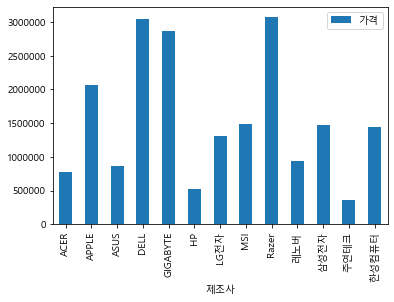

In [125]:
company_price.plot(kind='bar')
plt.show()

# 화면크기별 가격 평균